In [17]:
import pandas as pd

# 데이터셋 정의
data = {
    "Marriage Duration (Years)": [1.00, 4.80, 8.60, 12.40, 16.20, 20.00, 23.80, 27.60, 31.40, 35.20, 
                                  39.00, 18.00, 19.60, 21.20, 22.80, 24.40, 26.00, 27.60, 29.20, 30.80, 
                                  32.40, 34.00, 33.00, 29.00, 28.00, 21.00],
    "Age at Marriage": [28, 32, 31, 29, 35, 33, 40, 22, 30, 37, 39, 29, 34, 26, 28, 25, 32, 31, 36, 34, 
                        30, 33, 31, 28, 30, 32],
    "Marriage Type": ['Arranged', 'Love', 'Love', 'Arranged', 'Arranged', 'Love', 'Arranged', 'Love', 
                      'Arranged', 'Love', 'Love', 'Love', 'Arranged', 'Love', 'Love', 'Arranged', 'Arranged', 
                      'Love', 'Arranged', 'Arranged', 'Love', 'Arranged', 'Love', 'Arranged', 'Arranged', 
                      'Love'],
    "Education Level": ['Secondary', 'Postgraduate', 'Graduate', 'Secondary', 'Graduate', 'Secondary', 'Graduate', 
                        'Postgraduate', 'Graduate', 'Primary', 'Secondary', 'Postgraduate', 'Graduate', 'Primary', 
                        'Secondary', 'Graduate', 'Postgraduate', 'Primary', 'Postgraduate', 'Graduate', 
                        'Secondary', 'Graduate', 'Postgraduate', 'Primary', 'Graduate', 'Postgraduate'],
    "Income Level (INR per month)": [35000, 50000, 45000, 40000, 60000, 70000, 50000, 30000, 65000, 
                                    70000, 75000, 30000, 55000, 65000, 40000, 45000, 30000, 70000, 60000, 
                                    45000, 50000, 70000, 60000, 75000, 65000, 40000],
    "Caste/Religion": ['Hindu', 'Muslim', 'Hindu', 'Sikh', 'Jain', 'Muslim', 'Hindu', 'Christian', 
                        'Muslim', 'Sikh', 'Hindu', 'Jain', 'Muslim', 'Hindu', 'Sikh', 'Muslim', 'Jain', 'Hindu', 
                        'Muslim', 'Christian', 'Jain', 'Sikh', 'Hindu', 'Muslim', 'Jain', 'Hindu'],
    "Urban/Rural": ['Urban', 'Rural', 'Urban', 'Rural', 'Urban', 'Urban', 'Rural', 'Rural', 'Urban', 'Urban',
                    'Urban', 'Rural', 'Urban', 'Urban', 'Rural', 'Urban', 'Rural', 'Urban', 'Urban', 'Rural',
                    'Rural', 'Urban', 'Rural', 'Rural', 'Urban', 'Urban'],
    "Family Involvement": ['High', 'Moderate', 'Low', 'High', 'Moderate', 'Low', 'Moderate', 'High', 'Low', 'High', 
                           'Moderate', 'Low', 'High', 'High', 'Moderate', 'Low', 'High', 'High', 'Low', 'Low', 
                           'Moderate', 'High', 'Low', 'Moderate', 'High', 'Low'],
    "Children": [2, 3, 4, 1, 2, 3, 1, 2, 4, 3, 2, 1, 1, 3, 4, 1, 2, 3, 1, 2, 4, 2, 3, 1, 2, 4]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 범주형 변수 처리 (Label Encoding)
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ['Marriage Type', 'Education Level', 'Caste/Religion', 'Urban/Rural', 'Family Involvement']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# 데이터셋 확인
df.head()


,Marriage Duration (Years),Age at Marriage,Marriage Type,Education Level,Income Level (INR per month),Caste/Religion,Urban/Rural,Family Involvement,Children
0,1.0,28,0,3,35000,1,1,0,2
1,4.8,32,1,1,50000,3,0,2,3
2,8.6,31,1,0,45000,1,1,1,4
3,12.4,29,0,3,40000,4,0,0,1
4,16.2,35,0,0,60000,2,1,2,2


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# 특성과 레이블 정의
X = df.drop('Marriage Duration (Years)', axis=1)
y = df['Marriage Duration (Years)']

# 데이터셋을 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의
models = {
    "Random Forest": RandomForestRegressor(),
    "Linear Regression": LinearRegression(),
    "SVR": SVR()
}

# 모델 학습 및 평가
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[model_name] = mse

# 성능 결과 출력
results

{'Random Forest': 127.71734000000008,
 'Linear Regression': 188.16062987139154,
 'SVR': 118.46701192533028}

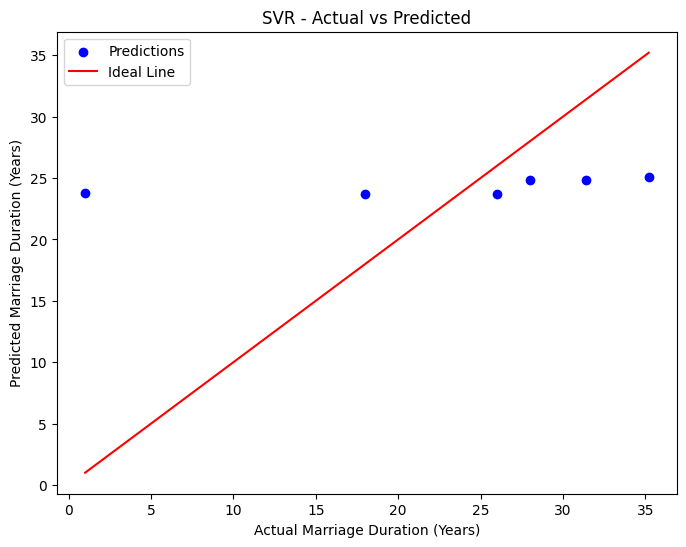

In [19]:
import matplotlib.pyplot as plt

# 가장 성능이 우수한 모델 선택 (예시: Random Forest)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# 예측값 계산
y_pred_best = best_model.predict(X_test)

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel('Actual Marriage Duration (Years)')
plt.ylabel('Predicted Marriage Duration (Years)')
plt.title(f'{best_model_name} - Actual vs Predicted')
plt.legend()
plt.show()


In [20]:
from sklearn.model_selection import GridSearchCV

# RandomForest 모델의 하이퍼파라미터 튜닝
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV를 이용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_

# 최적의 모델
best_rf_model = grid_search.best_estimator_

# 최적 모델을 이용한 예측
y_pred_best_rf = best_rf_model.predict(X_test)

# 성능 평가
best_rf_mse = mean_squared_error(y_test, y_pred_best_rf)
best_rf_mse


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_sa

122.81337773514765